In [2]:
import sys; sys.path.append("../..") # use local neural_maxwell package

import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

from angler import Simulation
from angler.derivatives import unpack_derivs

from neural_maxwell.datasets.generators import Cavity2D
from neural_maxwell.constants import *

np.set_printoptions(precision=3)

In [2]:
DEVICE_LENGTH = 32
CAVITY_BUFFER = 4
BUFFER_PERMITTIVITY = -1e20
NPML = 0
DL = 0.05
MODE = "Ez"

In [3]:
epsilons = np.ones((DEVICE_LENGTH, DEVICE_LENGTH))
epsilons[4:20, 4:20] = 2.5

perms, src_x, src_y, Hx, Hy, Ez = Cavity2D(device_length=DEVICE_LENGTH, cavity_buffer=CAVITY_BUFFER).solve(epsilons)

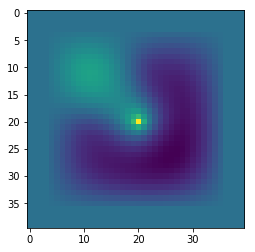

In [4]:
plt.imshow(np.real(Ez))
plt.show()

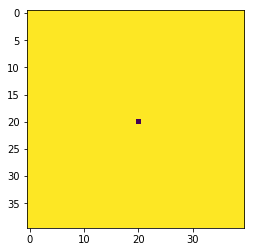

In [13]:
curl_op, eps_op = Cavity2D(device_length=DEVICE_LENGTH, cavity_buffer=CAVITY_BUFFER).get_operators()
curl_op = np.asarray(np.real(curl_op))

E = np.real(Ez).flatten()

curl_curl_E = (SCALE / L0**2) * curl_op @ E
epsilon_E = (SCALE * -OMEGA**2 * MU0 * EPSILON0) * perms.flatten() * E

zero = (curl_curl_E - epsilon_E).reshape(40,40)

plt.imshow(zero)
# plt.plot(epsilon_E)
plt.show()

In [16]:
zero[20,20]

-1.5268139561104095